In [2]:
import pandas as pd

data = pd.read_csv('iris.csv')
features = data.columns

print(features, data)

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')       Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
0      1            5.1           3.5            1.4           0.2   
1      2            4.9           3.0            1.4           0.2   
2      3            4.7           3.2            1.3           0.2   
3      4            4.6           3.1            1.5           0.2   
4      5            5.0           3.6            1.4           0.2   
..   ...            ...           ...            ...           ...   
145  146            6.7           3.0            5.2           2.3   
146  147            6.3           2.5            5.0           1.9   
147  148            6.5           3.0            5.2           2.0   
148  149            6.2           3.4            5.4           2.3   
149  150            5.9           3.0            5.1           1.8   

            Species  
0       Iris-seto

In [3]:
inp_fea = features[1:5]
out_fea = features[5:6]

In [4]:
from sklearn.preprocessing import OrdinalEncoder

colors = {0: 'red', 1: 'green', 2: 'blue'}

def data_to_color(data, colors = colors):
    arr = OrdinalEncoder().fit_transform(data)
    arr = [colors[x[0]] for x in arr]
    return arr

In [5]:
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering, SpectralClustering

kmeans = KMeans(n_clusters=3, init='random', n_init=1, verbose=3, random_state=26)
kmeans.fit(data[inp_fea], data[out_fea])
score = kmeans.score(data[inp_fea], data[out_fea])

print(score, kmeans.cluster_centers_, kmeans.get_params())

Initialization complete
Iteration 0, inertia 166.21000000000004.
Iteration 1, inertia 85.95840718372943.
Iteration 2, inertia 79.44547281875714.
Iteration 3, inertia 78.94084142614602.
Converged at iteration 3: strict convergence.
-78.94084142614601 [[5.006      3.418      1.464      0.244     ]
 [5.9016129  2.7483871  4.39354839 1.43387097]
 [6.85       3.07368421 5.74210526 2.07105263]] {'algorithm': 'lloyd', 'copy_x': True, 'init': 'random', 'max_iter': 300, 'n_clusters': 3, 'n_init': 1, 'random_state': 26, 'tol': 0.0001, 'verbose': 3}


c:\Users\1mana\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


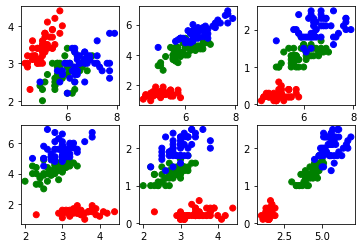

In [6]:
from matplotlib import pyplot

cnt = 0
fig, ax = pyplot.subplots(nrows=2, ncols=3)

for i, feat1 in enumerate(inp_fea[:-1]):
    for feat2 in inp_fea[i+1:]:
        r = cnt // 3
        c = cnt % 3
        ax[r][c].scatter(data[feat1], data[feat2], c=data_to_color(data[['Species']]))
        cnt += 1

pyplot.show()

C:\Users\1mana\AppData\Local\Temp\ipykernel_7852\340800380.py:23: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


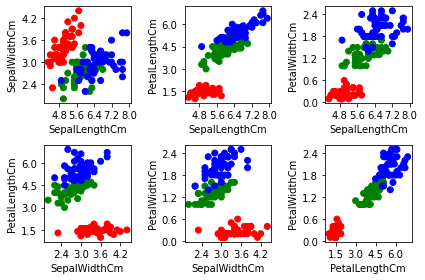

In [11]:
from matplotlib import pyplot
import matplotlib.ticker as plticker

def get_all_plots(classes, name):
    cnt = 0
    fig, ax = pyplot.subplots(nrows=2, ncols=3)

    for i, feat1 in enumerate(inp_fea[:-1]):
        for feat2 in inp_fea[i+1:]:
            r = cnt // 3
            c = cnt % 3
            cnt += 1

            ax[r][c].scatter(data[feat1], data[feat2], c=data_to_color(classes))
            ax[r][c].set_xlabel(feat1)
            ax[r][c].set_ylabel(feat2)
            ax[r][c].xaxis.set_major_locator(plticker.MaxNLocator(5))
            ax[r][c].yaxis.set_major_locator(plticker.MaxNLocator(5))

    fig.set_facecolor('white')
    fig.tight_layout()
    fig.savefig(name)
    fig.show()

get_all_plots(data[out_fea], 'ytrue.png')

c:\Users\1mana\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Initialization complete
Iteration 0, inertia 166.21000000000004.
Iteration 1, inertia 85.95840718372943.
Iteration 2, inertia 79.44547281875714.
Iteration 3, inertia 78.94084142614602.
Converged at iteration 3: strict convergence.


C:\Users\1mana\AppData\Local\Temp\ipykernel_7852\340800380.py:23: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


{'scores': -78.94084142614601,
 'centers': array([[5.006     , 3.418     , 1.464     , 0.244     ],
        [5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
        [6.85      , 3.07368421, 5.74210526, 2.07105263]]),
 'params': {'algorithm': 'lloyd',
  'copy_x': True,
  'init': 'random',
  'max_iter': 300,
  'n_clusters': 3,
  'n_init': 1,
  'random_state': 26,
  'tol': 0.0001,
  'verbose': 3},
 'confusion': array([[50,  0,  0],
        [ 0, 48,  2],
        [ 0, 14, 36]], dtype=int64)}

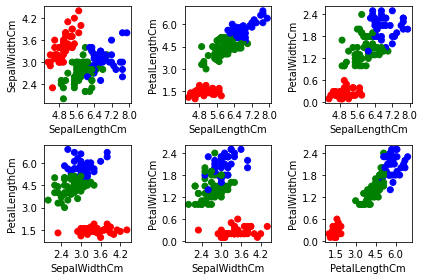

In [15]:
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering, SpectralClustering
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

ord = OrdinalEncoder()

def apply_kmeans():
    kmeans = KMeans(n_clusters=3, init='random', n_init=1, verbose=3, random_state=26)
    kmeans.fit(data[inp_fea], data[out_fea])
    score = kmeans.score(data[inp_fea], data[out_fea])
    pred = kmeans.predict(data[inp_fea]).reshape(-1,1)
    get_all_plots(pred, 'pred.png')
    confusion = confusion_matrix(ord.fit_transform(data[out_fea]), ord.fit_transform(pred))

    return {"scores": score, "centers": kmeans.cluster_centers_, "params": kmeans.get_params(), "confusion": confusion}

apply_kmeans()